
#### Author of Jupyter Notebook : Monika Avila Marquez 
(All possible mistakes are my responsability and you are encouraged to email me in case you find any)

### ONE WAY ERROR COMPONENT  MODEL with R

In this Jupyter Notebook, I provide an empirical illustration of the one way Error Component Model of Chapter 2 of Badi Baltagi, Econometric Analysis of Panel Data, 5th. Edition using the material provided in "Getting Started in Fixed/Random Effects Models using R", Torres-Reyna Oscar, https://www.princeton.edu/~otorres/Panel101R.pdf. 

In [1]:
install.packages("caTools")
install.packages("bitops")
install.packages("gplots")
install.packages("plm")

Installing package into 'C:/Users/Monika/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'caTools' is not available (for R version 3.5.0)"Installing package into 'C:/Users/Monika/Documents/R/win-library/3.5'
(as 'lib' is unspecified)



  There is a binary version available but the source version is later:
       binary source needs_compilation
bitops  1.0-6  1.0-7              TRUE

  Binaries will be installed
package 'bitops' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Monika\AppData\Local\Temp\Rtmp8IYTWk\downloaded_packages


Installing package into 'C:/Users/Monika/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"dependency 'caTools' is not available"


  There is a binary version available but the source version is later:
       binary source needs_compilation
gplots  3.0.3  3.1.1             FALSE



installing the source package 'gplots'

Warning message in install.packages("gplots"):
"installation of package 'gplots' had non-zero exit status"

In [2]:
library(foreign)
library(car)


Warning message:
"package 'car' was built under R version 3.5.2"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.5.2"

In [3]:
require(gplots)

Loading required package: gplots
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'gplots'"

In [4]:
# 1. Upload data  
Panel <- read.dta("http://dss.princeton.edu/training/Panel101.dta")
head(Panel)

country,year,y,y_bin,x1,x2,x3,opinion,op
A,1990,1342787840,1,0.2779036,-1.1079559,0.28255358,Str agree,1
A,1991,-1899660544,0,0.3206847,-0.9487200,0.49253848,Disag,0
A,1992,-11234363,0,0.3634657,-0.7894840,0.70252335,Disag,0
A,1993,2645775360,1,0.2461440,-0.8855330,-0.09439092,Disag,0
A,1994,3008334848,1,0.4246230,-0.7297683,0.94613063,Disag,0
A,1995,3229574144,1,0.4772141,-0.7232460,1.02968037,Str agree,1


In [5]:
# 1. Data exploration: goal is to understand the data set 
# 1.1 Size or amount of data
summary(Panel)
nrow(Panel)
# 1.2 Completeness of the data
NROW(na.omit(Panel))
# 1.3 Correctness of the data
#We do not have much info about this so we can 
#assume data is correct and no measurement error on the variables


 country      year            y                  y_bin           x1         
 A:10    Min.   :1990   Min.   :-7.863e+09   Min.   :0.0   Min.   :-0.5676  
 B:10    1st Qu.:1992   1st Qu.: 2.466e+08   1st Qu.:1.0   1st Qu.: 0.3290  
 C:10    Median :1994   Median : 1.898e+09   Median :1.0   Median : 0.6413  
 D:10    Mean   :1994   Mean   : 1.845e+09   Mean   :0.8   Mean   : 0.6480  
 E:10    3rd Qu.:1997   3rd Qu.: 3.372e+09   3rd Qu.:1.0   3rd Qu.: 1.0958  
 F:10    Max.   :1999   Max.   : 8.941e+09   Max.   :1.0   Max.   : 1.4464  
 G:10                                                                       
       x2                x3                opinion         op     
 Min.   :-1.6218   Min.   :-1.16539   Str agree:20   Min.   :0.0  
 1st Qu.:-1.2156   1st Qu.:-0.07931   Agree    :15   1st Qu.:0.0  
 Median :-0.4621   Median : 0.51419   Disag    :19   Median :0.5  
 Mean   : 0.1339   Mean   : 0.76185   Str disag:16   Mean   :0.5  
 3rd Qu.: 1.6078   3rd Qu.: 1.15486              

[1] 70

[1] 70

In [6]:
N=7
T=10

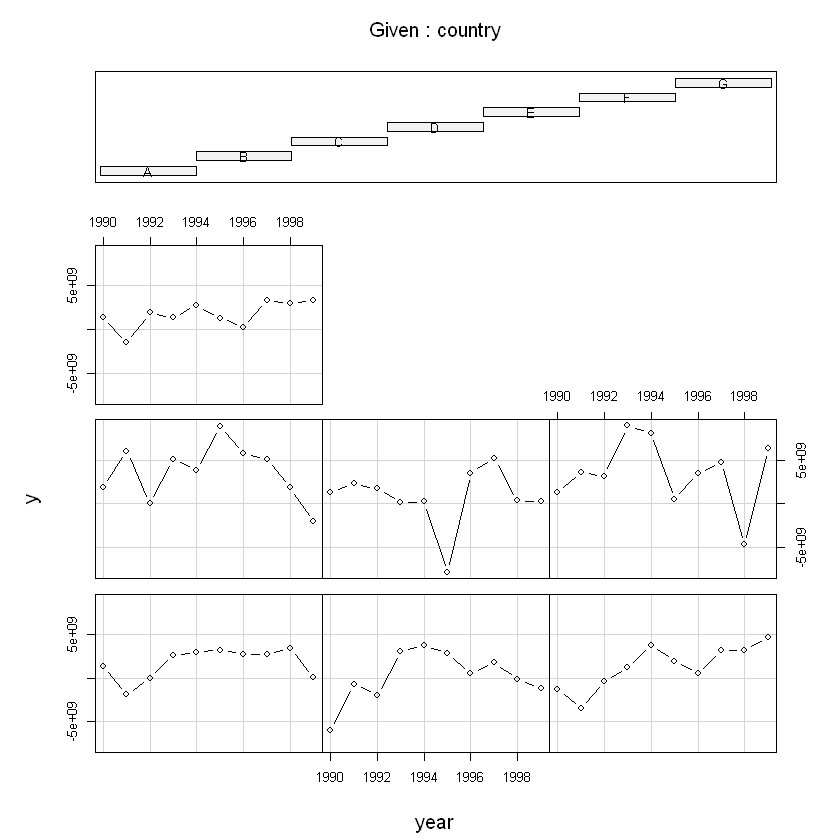

In [7]:
# 1.4 Graphical analysis 
coplot(y ~ year|country, type="b", data=Panel) # Generate a line chart for each country 

We can see that some countries present a similar behaviour over time on variable y.

Warning message in plot.window(...):
""reg.line" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""reg.line" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""reg.line" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""reg.line" is not a graphical parameter"Warning message in box(...):
""reg.line" is not a graphical parameter"Warning message in title(...):
""reg.line" is not a graphical parameter"

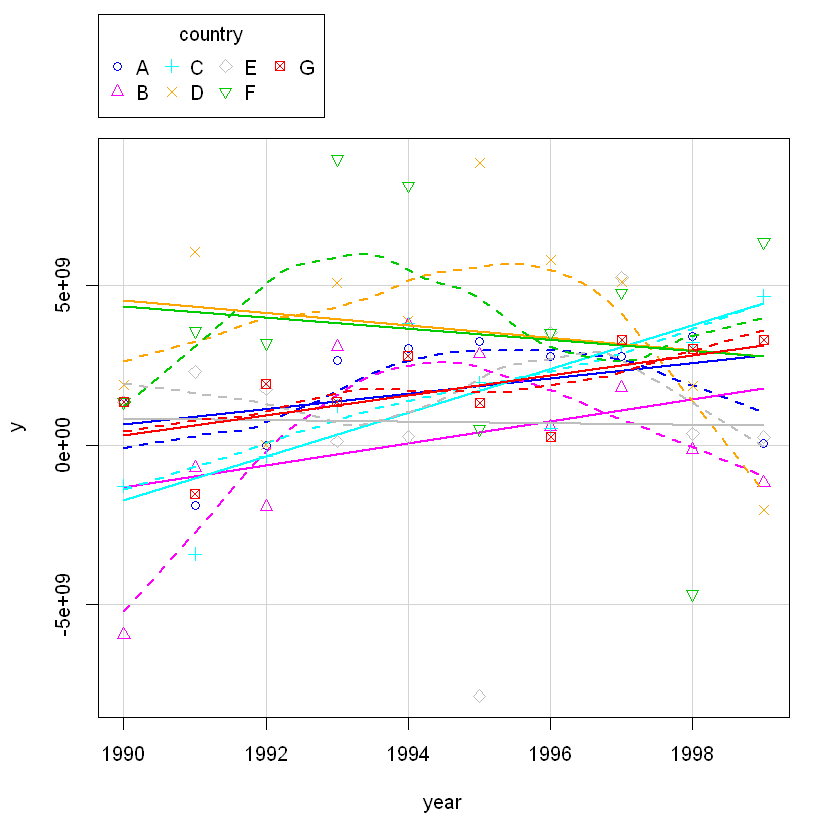

In [8]:
scatterplot(y~year|country, boxplots=FALSE, smooth=TRUE, reg.line=FALSE, data=Panel)


In [10]:

plotmeans(y ~ country, main="Heterogeineity across countries", data=Panel)

ERROR: Error in plotmeans(y ~ country, main = "Heterogeineity across countries", : could not find function "plotmeans"


In [11]:
# 2. Data modeling
# Naive pooled OLS
ols <-lm(y ~ x1, data=Panel)
summary(ols)


Call:
lm(formula = y ~ x1, data = Panel)

Residuals:
       Min         1Q     Median         3Q        Max 
-9.546e+09 -1.578e+09  1.554e+08  1.422e+09  7.183e+09 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 1.524e+09  6.211e+08   2.454   0.0167 *
x1          4.950e+08  7.789e+08   0.636   0.5272  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.028e+09 on 68 degrees of freedom
Multiple R-squared:  0.005905,	Adjusted R-squared:  -0.008714 
F-statistic: 0.4039 on 1 and 68 DF,  p-value: 0.5272


# 4. Model evaluation 

Problems? 

Ignoring unobserved individual specific heterogeneity can cause two issues depending on the correlation of this heterogeneity with the regressors: 

1. Unobserved individual specific heterogeneity uncorrelated to the regressors:  Inference is incorrect since we do not take into account the within individual correlations caused by the presence of the individual specific heterogeneity. In this case, we can model the unobserved heterogeneity as uncorrelated random effects and the BLUE is the GLS. Additionally, when N and T grow to infinity the GLS is equivalent to the Within estimator. 

or

2. Unobserved individual specific heterogeneity correlated to the regressors: Inconsistent estimates when the  individual specific heterogeneity is correlated to the regressors. In this case, we can use the Fixed Effects framweork and the BLUE estimator is Within estimator. 


I quote two authors below: 

1. Arellano in his book Panel Data Econometrics, 2003 explains: "As for the nature of the effects,strictly speaking,the term fixed effects would refer to a sampling process in which the same units are (possibly) repeatedly sampled for a given period holding constant the effects. In such context one often has in mind a distribution of individual effects chosen by the researcher. Here we imagine a sample randomly drawn from a multivariate population of observable data and unobservable effects. This notion may or may not correspond to the physical nature of data collection. It would be so,for example, in the case of some household surveys,but not with data on all quoted firms or OECD countries. In those cases,the multivariate population from which the data are supposed to come is a hypothetical one. Moreover,we are interested in models which only specify features of the conditional distribution f (yi | xi, ηi). Therefore,w e are not concerned with whether the distribution that generates the data on xi and ηi, f (xi, ηi) say,is representative of some cross-sectional population or of the researcher's wishes. We just regard (yi, xi, ηi) as a random sample from the (perhaps artificial) multivariate population with joint distribution f (yi, xi, ηi) = f (yi | xi, ηi) f (xi, ηi) and focus on the conditional distribution of yi. So in common with much of the econometric literature,we use the term fixed effects to refer to a situation in which f (ηi | xi) is left unrestricted"

2.  Wooldrdige, in his book Econometric Analysis of Cross Section and Panel Data expalins "methodological papers, but also in applications, one often sees a discussion about whether ci will be treated as a random e¤ect or a fixed e¤ect. Originally, such discussions centered on whether c_i (the indivudal specific unobserved effect) is properly viewed as a random variable or as a parameter to be estimated. In the traditional approach to panel data models, c_i is called a ‘‘random e¤ect’’ when it is treated as a random variable and a ‘‘fixed effect’’ when it is treated as a parameter to be estimated for each cross section observation. Our view is that discussions about whether the ci should be treated as random variables or as parameters to be estimated are wrongheaded for microeconometric panel data applications. With a large number of random draws from the cross section, it almost always makes sense to treat the unobserved e¤ects, ci, as random draws from the population, along with yit and xit. This approach is certainly appropriate from an omitted variables or neglected heterogeneity perspective."

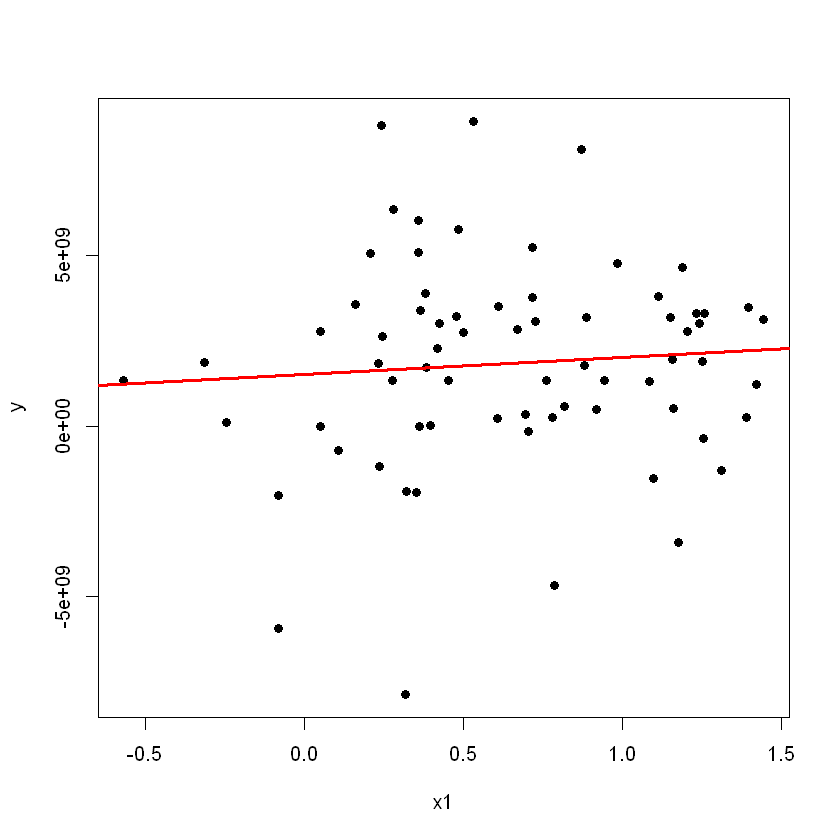

In [12]:

yhat <- ols$fitted
plot(Panel$x1, Panel$y, pch=19, xlab="x1", ylab="y")
abline(lm(Panel$y~Panel$x1),lwd=3, col="red")

We can see that the fitting of the linear pooled model is poor. 

In [13]:
# 2. Modeling 
# Least Squares Dummy estimation
fixed.dum <-lm(y ~ x1 + factor(country) - 1, data=Panel)
summary(fixed.dum)


Call:
lm(formula = y ~ x1 + factor(country) - 1, data = Panel)

Residuals:
       Min         1Q     Median         3Q        Max 
-8.634e+09 -9.697e+08  5.405e+08  1.386e+09  5.612e+09 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
x1                2.476e+09  1.107e+09   2.237  0.02889 *  
factor(country)A  8.805e+08  9.618e+08   0.916  0.36347    
factor(country)B -1.058e+09  1.051e+09  -1.006  0.31811    
factor(country)C -1.723e+09  1.632e+09  -1.056  0.29508    
factor(country)D  3.163e+09  9.095e+08   3.478  0.00093 ***
factor(country)E -6.026e+08  1.064e+09  -0.566  0.57329    
factor(country)F  2.011e+09  1.123e+09   1.791  0.07821 .  
factor(country)G -9.847e+08  1.493e+09  -0.660  0.51190    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.796e+09 on 62 degrees of freedom
Multiple R-squared:  0.4402,	Adjusted R-squared:  0.368 
F-statistic: 6.095 on 8 and 62 DF,  p-value: 8.892e-06



In this case, we estimated the model just by adding dummies for each country performing OLS. In this case, the panel has N=7 and T=10 which means 70 data points in total and 8 regressors included and estimation with this Naive method is ok but it is better to use Within estimation to avoid inversion of a big matrix when N grows to infinity. 


In [14]:
yhat <- fixed.dum$fitted

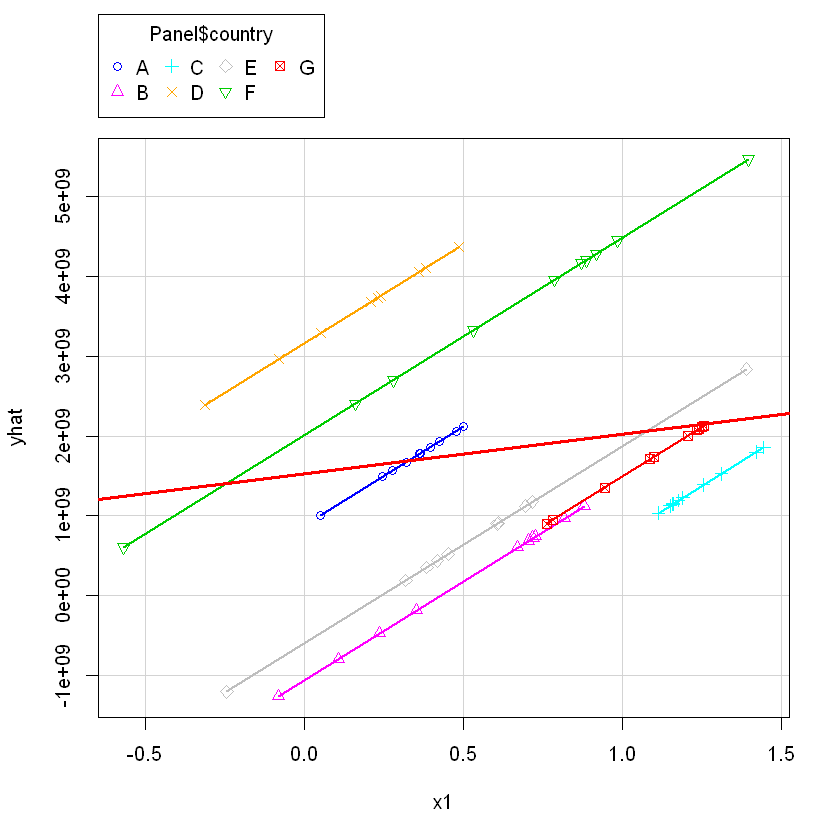

In [15]:
library(car)
scatterplot(yhat~Panel$x1|Panel$country, boxplots=FALSE, xlab="x1", ylab="yhat",smooth=FALSE)
abline(lm(Panel$y~Panel$x1),lwd=3, col="red")

We can see the parallel fitted linear regressions for each country compared with the linear fitted regression for the pooled model. 

In [16]:
# Within Estimation: This is the optimal to avoid inversion of a potential huge matrix. 
# (Reference for this section: https://www.econometrics-with-r.org/10-3-fixed-effects-regression.html)
# Obtain demeaned data
Panel_demeaned <- with(Panel,
            data.frame(y_w = y - ave(y, country),
            x1_w = x1 - ave(x1, country)))
# Estimate the regression
summary(lm(y_w ~ x1_w - 1, data = Panel_demeaned))


Call:
lm(formula = y_w ~ x1_w - 1, data = Panel_demeaned)

Residuals:
       Min         1Q     Median         3Q        Max 
-8.634e+09 -9.697e+08  5.405e+08  1.386e+09  5.612e+09 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)  
x1_w 2.476e+09  1.049e+09    2.36   0.0211 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.65e+09 on 69 degrees of freedom
Multiple R-squared:  0.07468,	Adjusted R-squared:  0.06127 
F-statistic: 5.569 on 1 and 69 DF,  p-value: 0.02111


We obtain the same coefficient as in the LSDV Model but if N would grow, we rather use Within estimation. 

In [17]:
# Within Estimation: Another option in R 
# (Reference for this section: https://www.econometrics-with-r.org/10-3-fixed-effects-regression.html)
# install and load the 'plm' package
install.packages("plm")
library(plm)

Installing package into 'C:/Users/Monika/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
also installing the dependency 'lmtest'




  There are binary versions available but the source versions are later:
       binary source needs_compilation
lmtest 0.9-37 0.9-38              TRUE
plm     2.2-3  2.4-1             FALSE

  Binaries will be installed
package 'lmtest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Monika\AppData\Local\Temp\Rtmp8IYTWk\downloaded_packages


installing the source package 'plm'



In [18]:


# estimate the fixed effects regression with plm()
fe_mod <- plm(y ~ x1, 
                    data = Panel,
                    index = c("country", "year"), 
                    model = "within")


In [19]:
summary(fe_mod)

Oneway (individual) effect Within Model

Call:
plm(formula = y ~ x1, data = Panel, model = "within", index = c("country", 
    "year"))

Balanced Panel: n = 7, T = 10, N = 70

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-8.63e+09 -9.70e+08  5.40e+08  0.00e+00  1.39e+09  5.61e+09 

Coefficients:
     Estimate Std. Error t-value Pr(>|t|)  
x1 2475617827 1106675594   2.237  0.02889 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    5.2364e+20
Residual Sum of Squares: 4.8454e+20
R-Squared:      0.074684
Adj. R-Squared: -0.029788
F-statistic: 5.00411 on 1 and 62 DF, p-value: 0.028892

In [1]:

# estimate the random effects regression with plm()
re_mod <- plm(y ~ x1, 
                    data = Panel,
                    index = c("country", "year"), 
                    model = "random")

ERROR: Error in plm(y ~ x1, data = Panel, index = c("country", "year"), model = "random"): could not find function "plm"


In [22]:
summary(re_mod)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = y ~ x1, data = Panel, model = "random", index = c("country", 
    "year"))

Balanced Panel: n = 7, T = 10, N = 70

Effects:
                    var   std.dev share
idiosyncratic 7.815e+18 2.796e+09 0.873
individual    1.133e+18 1.065e+09 0.127
theta: 0.3611

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-8.94e+09 -1.51e+09  2.82e+08  0.00e+00  1.56e+09  6.63e+09 

Coefficients:
              Estimate Std. Error z-value Pr(>|z|)
(Intercept) 1037014284  790626206  1.3116   0.1896
x1          1247001782  902145601  1.3823   0.1669

Total Sum of Squares:    5.6595e+20
Residual Sum of Squares: 5.5048e+20
R-Squared:      0.02733
Adj. R-Squared: 0.013026
Chisq: 1.91065 on 1 DF, p-value: 0.16689